In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Identification and Explanation of Different Variables

In [2]:
meaning = pd.read_csv("data/features_meaning.csv")
meaning

,Column name,Meaning
0,ID,Subject identification number. A subjects can ...
1,TIMEPOINT,"baseline visit (v00), 1 year follow-up (v12), ..."
2,LATERALITY,Left or right knee
3,LATCOV,Coverage of lateral meniscus on lateral tibia
4,MEDCOV,Coverage of medial meniscus on medial tibia
5,LATEXTR,Extrusion of the lateral meniscus
6,MEDEXTR,Extrusion of the medial meniscus
7,MTCVOL,Medial tibial cartilage volume
8,LTCVOL,Lateral tibial cartilage volume
9,MM_AREA,Medial meniscus area


#### Data Loading

In [3]:
data = pd.read_csv("data/knee_features.csv")
data

,ID,TIMEPOINT,LATERALITY,LATCOV,MEDCOV,LATEXTR,MEDEXTR,MTCVOL,LTCVOL,MM_AREA,RATIO_MM,LM_AREA,RATIO_LM,FC_VOLUME,TC_VOLUME,MM_VOL,LM_VOL,KLG
0,9000099,v00,RIGHT,0.552836,0.240201,-1.288910,2.842620,1552.54,2408.74,1352.04,1.14,2300.80,0.77,14660.77,3961.29,1275.83,3122.21,2.0
1,9000296,v00,RIGHT,0.594802,0.500594,-0.110023,0.141658,2009.58,2170.92,2324.76,0.79,2048.56,0.75,14285.34,4180.50,3098.30,2873.69,2.0
2,9000622,v00,RIGHT,0.620763,0.506735,-0.722115,2.204600,1084.06,1139.15,1706.61,0.92,1768.13,0.89,8835.25,2223.21,1953.66,2103.00,1.0
3,9000798,v00,RIGHT,0.610871,0.449211,-0.138771,1.402580,2763.71,2641.91,2443.74,0.68,2424.60,0.67,19886.17,5405.62,3744.49,3763.75,1.0
4,9001104,v00,RIGHT,0.614401,0.508037,-0.640022,0.592623,1505.37,1527.42,1853.58,0.81,1835.04,0.76,11613.47,3032.79,2413.39,2524.95,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46991,9991580,v96,LEFT,0.596185,0.291915,-0.787285,2.860950,1452.61,1148.26,1725.38,0.98,1491.99,0.88,11231.71,2603.02,1860.34,1786.83,NaN
46992,9996098,v96,LEFT,0.701408,0.475772,1.959140,1.830300,1623.54,2156.31,2402.69,0.70,2663.95,0.64,15028.30,3788.50,3597.67,4366.68,NaN
46993,9998089,v96,LEFT,0.646364,0.580651,0.019051,0.691618,1970.31,1957.66,2293.46,0.70,1978.13,0.75,11752.57,3955.33,3396.69,2780.36,1.0
46994,9999510,v96,LEFT,0.621843,0.425952,-1.388630,-0.149333,3210.88,3228.93,2468.59,0.71,2013.23,0.82,19490.35,6420.83,3611.34,2600.51,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46996 entries, 0 to 46995
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          46996 non-null  int64  
 1   TIMEPOINT   46996 non-null  object 
 2   LATERALITY  46996 non-null  object 
 3   LATCOV      46996 non-null  float64
 4   MEDCOV      46996 non-null  float64
 5   LATEXTR     46996 non-null  float64
 6   MEDEXTR     46996 non-null  float64
 7   MTCVOL      46996 non-null  float64
 8   LTCVOL      46996 non-null  float64
 9   MM_AREA     46996 non-null  float64
 10  RATIO_MM    46996 non-null  float64
 11  LM_AREA     46996 non-null  float64
 12  RATIO_LM    46996 non-null  float64
 13  FC_VOLUME   46996 non-null  float64
 14  TC_VOLUME   46996 non-null  float64
 15  MM_VOL      46996 non-null  float64
 16  LM_VOL      46996 non-null  float64
 17  KLG         41932 non-null  float64
dtypes: float64(15), int64(1), object(2)
memory usage: 6.5+ MB


#### Dataset without the missing values

In [5]:
data = data.dropna()
data

,ID,TIMEPOINT,LATERALITY,LATCOV,MEDCOV,LATEXTR,MEDEXTR,MTCVOL,LTCVOL,MM_AREA,RATIO_MM,LM_AREA,RATIO_LM,FC_VOLUME,TC_VOLUME,MM_VOL,LM_VOL,KLG
0,9000099,v00,RIGHT,0.552836,0.240201,-1.288910,2.842620,1552.54,2408.74,1352.04,1.14,2300.80,0.77,14660.77,3961.29,1275.83,3122.21,2.0
1,9000296,v00,RIGHT,0.594802,0.500594,-0.110023,0.141658,2009.58,2170.92,2324.76,0.79,2048.56,0.75,14285.34,4180.50,3098.30,2873.69,2.0
2,9000622,v00,RIGHT,0.620763,0.506735,-0.722115,2.204600,1084.06,1139.15,1706.61,0.92,1768.13,0.89,8835.25,2223.21,1953.66,2103.00,1.0
3,9000798,v00,RIGHT,0.610871,0.449211,-0.138771,1.402580,2763.71,2641.91,2443.74,0.68,2424.60,0.67,19886.17,5405.62,3744.49,3763.75,1.0
4,9001104,v00,RIGHT,0.614401,0.508037,-0.640022,0.592623,1505.37,1527.42,1853.58,0.81,1835.04,0.76,11613.47,3032.79,2413.39,2524.95,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46982,9974824,v96,LEFT,0.598080,0.481619,-1.355670,0.641773,1107.60,1472.43,1439.84,0.89,1489.80,0.85,8900.56,2574.83,1704.02,1837.26,0.0
46986,9979306,v96,LEFT,0.610782,0.620314,-0.121162,0.144291,1401.44,1891.41,2108.00,0.80,1781.31,0.82,12218.63,3295.18,2919.00,2283.88,0.0
46989,9988820,v96,LEFT,0.639981,0.493407,0.734016,1.386140,1245.12,1388.60,1594.28,0.84,2084.11,0.85,9814.17,2612.51,1956.45,2693.27,2.0
46990,9989309,v96,LEFT,0.237709,0.481720,-5.070030,3.079690,1193.76,1162.87,1953.72,0.82,1827.46,1.32,11890.18,2358.31,2515.28,776.74,3.0


##### 41932 Unique rows, 5064 rows have no values given for the KLG 

#### Number of Unique Subjects tested - 4503

In [6]:
data["ID"].value_counts()

9242544    17
9230363    16
9282203    16
9181790    16
9781279    16
           ..
9426003     1
9536151     1
9522128     1
9714143     1
9555914     1
Name: ID, Length: 4503, dtype: int64

#### Observations for each timepoint

##### Baseline visit (v00), 1 year follow-up (v12), 2 year follow-up (v24), 3 year follow-up (v36), 4 year follow-up (v48), 6 year follow-up (v72), and 8 year follow-up (v96)

In [7]:
data["TIMEPOINT"].value_counts()

v00    8785
v12    7886
v24    7226
v48    6375
v36    5407
v72    3198
v96    3055
Name: TIMEPOINT, dtype: int64

Text(0.5, 0, 'Timepoints')

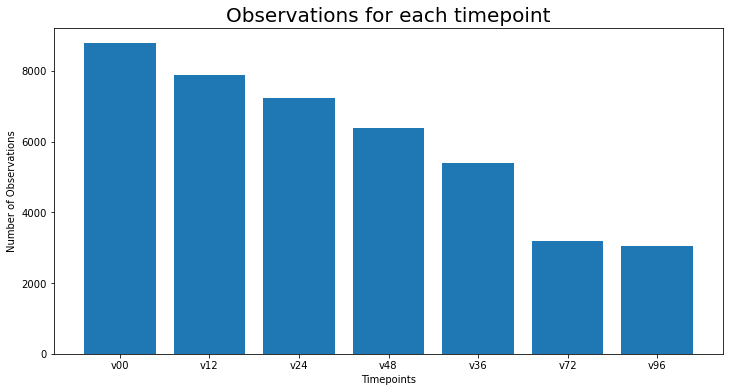

In [8]:
data_dict = dict(data.TIMEPOINT.value_counts())

plt.figure(figsize=(12,6))
plt.title('Observations for each timepoint', size=20)
plt.bar(data_dict.keys(), data_dict.values())
plt.ylabel('Number of Observations', size=10)
plt.xlabel('Timepoints', size=10)

#### Observations about Knee Position

In [9]:
data["LATERALITY"].value_counts()

RIGHT    21741
LEFT     20191
Name: LATERALITY, dtype: int64

#### Observation about the KLG scale

In [10]:
data["KLG"].value_counts()

0.0    16656
2.0    10293
1.0     7857
3.0     5530
4.0     1596
Name: KLG, dtype: int64

Text(0.5, 0, 'KLG scale')

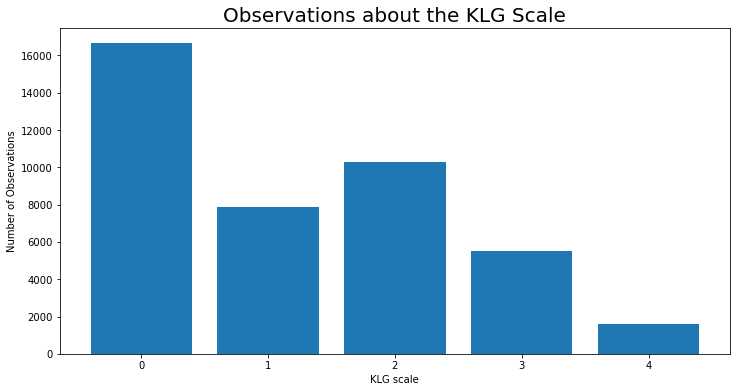

In [11]:
data_dict = dict(data.KLG.value_counts())

plt.figure(figsize=(12,6))
plt.title('Observations about the KLG Scale', size=20)
plt.bar(data_dict.keys(), data_dict.values())
plt.ylabel('Number of Observations', size=10)
plt.xlabel('KLG scale', size=10)

#### Correlation between different variables

In [12]:
data_corr = data.drop(['ID', 'TIMEPOINT', 'LATERALITY'], axis = 1)
data_corr.corr()

,LATCOV,MEDCOV,LATEXTR,MEDEXTR,MTCVOL,LTCVOL,MM_AREA,RATIO_MM,LM_AREA,RATIO_LM,FC_VOLUME,TC_VOLUME,MM_VOL,LM_VOL,KLG
LATCOV,1.000000,0.162768,0.370303,0.009071,-0.075412,-0.047879,0.120507,-0.181500,0.249000,-0.657814,-0.104798,-0.064153,0.148836,0.464475,-0.182118
MEDCOV,0.162768,1.000000,0.102776,-0.287597,-0.160761,-0.084428,0.217568,-0.545480,-0.031022,-0.050153,-0.182568,-0.126734,0.401759,-0.006012,-0.414132
LATEXTR,0.370303,0.102776,1.000000,-0.123760,-0.033669,0.050463,0.017381,-0.091880,0.163269,-0.375931,-0.024513,0.011891,0.048431,0.189090,-0.142032
MEDEXTR,0.009071,-0.287597,-0.123760,1.000000,0.141804,0.044337,0.149862,0.011427,0.169697,-0.107260,0.159285,0.094795,0.094558,0.172971,0.342555
MTCVOL,-0.075412,-0.160761,-0.033669,0.141804,1.000000,0.792482,0.687640,-0.294415,0.613538,-0.255971,0.879234,0.939037,0.642730,0.570130,0.138092
LTCVOL,-0.047879,-0.084428,0.050463,0.044337,0.792482,1.000000,0.597220,-0.278624,0.644611,-0.310508,0.842049,0.953854,0.559549,0.607048,-0.008842
MM_AREA,0.120507,0.217568,0.017381,0.149862,0.687640,0.597220,1.000000,-0.544433,0.666389,-0.393929,0.679858,0.675204,0.928131,0.664029,0.084503
RATIO_MM,-0.181500,-0.545480,-0.091880,0.011427,-0.294415,-0.278624,-0.544433,1.000000,-0.313337,0.290278,-0.249146,-0.302013,-0.702362,-0.346490,0.208794
LM_AREA,0.249000,-0.031022,0.163269,0.169697,0.613538,0.644611,0.666389,-0.313337,1.000000,-0.602380,0.710722,0.665407,0.610801,0.915822,0.095248
RATIO_LM,-0.657814,-0.050153,-0.375931,-0.107260,-0.255971,-0.310508,-0.393929,0.290278,-0.602380,1.000000,-0.268585,-0.301040,-0.389471,-0.741342,0.067811


<AxesSubplot:>

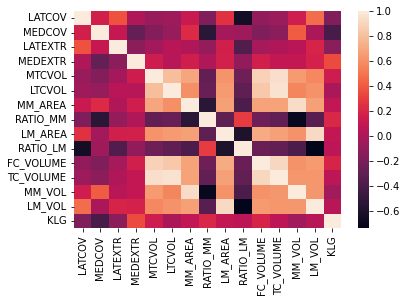

In [13]:
sns.heatmap(data_corr.corr())

### An overview of the demographics of data used in this study

![](data/summary.png)

### EDA Continued - Occurence of Duplicate values

In [14]:
duplicated_data = data[data.duplicated(subset=['KLG', 'ID', 'LATERALITY', 'TIMEPOINT'], keep=False)]
duplicated_data

,ID,TIMEPOINT,LATERALITY,LATCOV,MEDCOV,LATEXTR,MEDEXTR,MTCVOL,LTCVOL,MM_AREA,RATIO_MM,LM_AREA,RATIO_LM,FC_VOLUME,TC_VOLUME,MM_VOL,LM_VOL,KLG
342,9079404,v00,RIGHT,0.565833,0.417221,-0.950516,1.502880,1194.41,1240.01,1374.45,0.99,1367.55,0.91,8904.10,2434.42,1466.66,1599.44,0.0
343,9079404,v00,RIGHT,0.582901,0.435846,-1.259160,1.071130,1171.43,1202.97,1404.01,0.97,1394.33,0.90,8500.75,2374.41,1528.17,1637.21,0.0
612,9150439,v00,RIGHT,0.608219,0.424404,-1.454250,2.185170,2389.39,3436.98,2206.90,0.83,2440.66,0.83,18861.28,5826.37,2782.69,3123.51,2.0
613,9150439,v00,RIGHT,0.598622,0.417017,-1.484970,2.198930,2508.30,3507.13,2203.88,0.81,2433.01,0.83,18804.99,6015.43,2841.40,3094.29,2.0
631,9154516,v00,RIGHT,0.619305,0.507528,-0.264755,0.372665,1126.12,1405.16,1745.10,0.79,1493.16,0.86,9420.96,2531.28,2300.53,1839.59,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45657,9794849,v96,LEFT,0.613745,0.263459,-1.025940,1.351470,1266.15,1462.29,1267.64,1.64,1424.29,0.92,11580.90,2721.56,846.33,1642.15,0.0
45893,9961728,v96,LEFT,0.640836,0.254545,-1.072900,4.215740,1978.69,1822.00,1806.65,0.92,1717.41,0.78,11488.14,3801.16,2093.51,2318.77,3.0
45894,9961728,v96,LEFT,0.603185,0.283076,-1.507160,4.424410,1857.73,1894.76,1817.94,0.93,1676.83,0.79,11477.25,3747.19,2083.92,2235.77,3.0
46006,9072461,v96,LEFT,0.672299,0.536676,0.156555,1.122220,2284.25,2743.98,2806.59,0.60,2169.93,0.68,16005.92,5036.70,4848.09,3328.86,0.0


##### In our dataset, in 305 of the instances, there was a simultaneous occurrence of duplicate datapoints for the same subject at the same timepoint of the same knee. For these occurrences, the value of the KLG variable was the same, however the measurement of medical variables were different. We assumed that this might be because two back to back images of the same knee were taken. So, we kept these occurrences for our analysis.